In [27]:
# Import the neccessary Libraries
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load MNIST dataset
mnist = load_digits()
X = mnist.data
y = mnist.target

# Preprocess data --> split into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [29]:
# Implementation of Logistic Regression from scratch
# Implement Logistic Regression from scratch
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.loss_history = []  # To store the loss values
        for epoch in range(self.epochs):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            loss = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))  # Binary cross-entropy loss
            self.loss_history.append(loss)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        return np.round(self.sigmoid(np.dot(X, self.theta)))

In [37]:
class LogisticRegressionOvR:
    def __init__(self, n_classes, **kwargs):
        self.models = [LogisticRegressionFromScratch(**kwargs) for _ in range(n_classes)]

    def fit(self, X, y):
        for i, model in enumerate(self.models):
            binary_y = (y == i).astype(int)
            model.fit(X, binary_y)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models]).T
        return np.argmax(predictions, axis=1)


In [38]:
# Normalizing features
X_train /= 16.0
X_test /= 16.0

# Training the OvR Logistic Regression model
ovr_model = LogisticRegressionOvR(n_classes=10, learning_rate=0.01, epochs=1000)
ovr_model.fit(X_train, y_train)

# Making predictions
ovr_predictions = ovr_model.predict(X_test)

# Calculate accuracy or other metrics as needed


In [30]:
# Train Logistic Regression model from scratch
model_scratch = LogisticRegressionFromScratch()   # call on the model, no parameters, meaning default values remain
model_scratch.fit(X_train, (y_train == 7).astype(int))  # Binary classification for digit 7


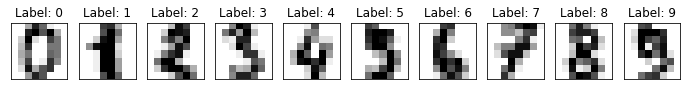

In [31]:
# Create a figure with 1 row and 10 columns of subplots
# Set the figure size to (12, 4) inches
# Remove the x and y ticks for each subplot
fig, axes = plt.subplots(1, 10, figsize=(12, 4), subplot_kw=dict(xticks=[], yticks=[]))

# Loop through each subplot in the 1x10 grid
for i, ax in enumerate(axes.flat):
    # Display the i-th image from the 'mnist' dataset in grayscale
    ax.imshow(mnist.images[i], cmap='gray_r')

    # Set the title of the subplot with the corresponding label from the 'mnist' dataset
    ax.set_title(f"Label: {mnist.target[i]}")

# Display the entire figure with all subplots
plt.show()


In [32]:
# Create an instance of the LogisticRegression model with a maximum of 1000 iterations
# Increasing max_iter allows the optimization algorithm more iterations to converge
model_prebuilt = LogisticRegression(max_iter=1000)

# Fit the logistic regression model to the training data
# The target variable is binary (y_train == 7), converted to integer using astype(int)
model_prebuilt.fit(X_train, (y_train == 7).astype(int))   # we first needed to convert the data into binary so that it can be trained on the model, now we checking for 7 using the trained model 

LogisticRegression(max_iter=1000)

In [40]:
# Evaluate and compare models
accuracy_scratch = np.mean(ovr_model.predict(X_test) == (y_test == 7))
accuracy_prebuilt = model_prebuilt.score(X_test, (y_test == 7).astype(int))

print(f"Accuracy (Logistic Regression from scratch): {accuracy_scratch}")   # the model from scratch performed slighly better compared to the prebuilt logistic regression model
print(f"Accuracy (Prebuilt Logistic Regression): {accuracy_prebuilt}")

Accuracy (Logistic Regression from scratch): 0.8733333333333333
Accuracy (Prebuilt Logistic Regression): 0.9088888888888889


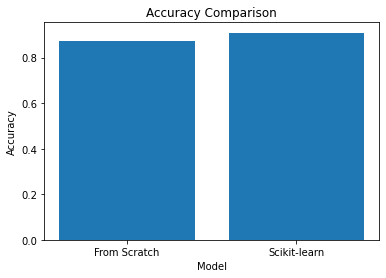

In [41]:
plt.bar(['From Scratch', 'Scikit-learn'], [accuracy_scratch, accuracy_prebuilt])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


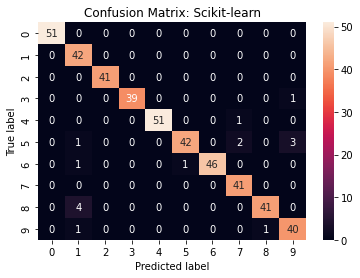

In [45]:
cm = confusion_matrix(y_test, predictions_prebuilt)
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix: Scikit-learn')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
